In [156]:
# Визуализация
import seaborn as sns

import matplotlib.pyplot as plt

#from mlxtend.plotting import plot_decision_regions

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-deep')
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std
from numpy import ravel

import scipy
import joblib
import re
import glob
import sklearn
from math import sqrt
from decimal import Decimal

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error

import xgboost as xgb
from xgboost import XGBRegressor

from geopy.exc import GeocoderTimedOut
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

from tqdm import tqdm

In [3]:
path = 'after_everyone.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
df = df.drop(['Unnamed: 0', 'The_number_of_rooms', 'Type_of', 'Underground', 'Address', 'House', 'Price', 'Phones', 'Description'], axis = 1)

In [26]:
df = df.drop(['Room_Square_m2', 'Window', 'Basil', 'Additionally', 'The_name_is_LCD', 'Series_at_home', 'Elevator', 'Garbage_chute'], axis = 1)

In [27]:
df = df.drop(['Тип', 'Адрес', 'Телефоны', 'Описание', 'Площадь комнат, м2', 'Дополнительно', 'Название ЖК', 'Серия дома'], axis = 1)

In [28]:
df = df.drop(['Высота потолков, м', 'Мусоропровод', 'Ссылка на объявление'], axis = 1)

In [29]:
df = df.drop(['Pass_lift_7', 'Pass_lift_8', 'Pass_lift_50', 'Pass_lift_60', 'Cargo_lift_8', 'Cargo_lift_6', 'NaN_okna', 'NaN_room'], axis = 1)

In [30]:
df = df[df['Distance_from_Cremlin'] < 40].reset_index(drop = True)

In [31]:
pd.get_dummies(df['District'])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19424,0,0,0,1,0,0,0,0,0,0,0,0
19425,0,0,1,0,0,0,0,0,0,0,0,0
19426,0,0,1,0,0,0,0,0,0,0,0,0
19427,0,0,1,0,0,0,0,0,0,0,0,0


In [11]:
df_District = pd.get_dummies(df['District'])
df = df.drop(['District'], axis = 1)

In [32]:
df = pd.concat([df, df_District], sort=False, axis=1)
df

,Area_m2,Ceiling_height_m,You_can_with_children,You_can_with_animals,Internet,Television,Air_conditioner,Dishwasher,Shower_cabin,Telephone,...,2,3,4,5,6,7,8,9,10,11
0,200.0,3.00,True,True,True,True,True,True,True,True,...,0,0,0,0,0,0,1,0,0,0
1,198.0,3.50,True,False,True,True,True,True,True,False,...,0,0,0,0,0,0,1,0,0,0
2,200.0,3.20,True,False,True,True,True,True,True,True,...,0,0,0,0,0,0,1,0,0,0
3,170.0,3.20,False,True,True,True,True,True,True,True,...,0,0,0,0,0,0,1,0,0,0
4,58.0,3.90,False,False,True,True,False,True,True,False,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19424,35.0,2.99,False,False,True,False,True,False,False,False,...,0,1,0,0,0,0,0,0,0,0
19425,38.7,2.99,False,False,False,True,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
19426,43.1,2.99,True,False,True,False,True,False,True,False,...,1,0,0,0,0,0,0,0,0,0
19427,52.5,2.65,False,False,False,False,True,True,False,False,...,1,0,0,0,0,0,0,0,0,0


In [33]:
df.columns.to_list()

['Area_m2',
 'Ceiling_height_m',
 'You_can_with_children',
 'You_can_with_animals',
 'Internet',
 'Television',
 'Air_conditioner',
 'Dishwasher',
 'Shower_cabin',
 'Telephone',
 'District',
 'Distance_from_Cremlin',
 'Floors_house',
 'Floors_flat',
 'House_block',
 'House_woden',
 'House_brick',
 'House_monolithic_brick',
 'House_monolithic',
 'House_noun',
 'House_panel',
 'House_Stalin',
 'House_shield',
 'House_oldfond',
 'Repair_without',
 'Repair_disigne',
 'Repair_evro',
 'Repair_cosmetic',
 'Parking_free_yard',
 'Parking_multilevel',
 'Parking_roof',
 'Parking_paid_yard',
 'Parking_underground',
 'Pass_lift_0',
 'Pass_lift_1',
 'Pass_lift_2',
 'Pass_lift_3',
 'Pass_lift_4',
 'Pass_lift_5',
 'Pass_lift_6',
 'Cargo_lift_0',
 'Cargo_lift_1',
 'Cargo_lift_2',
 'Cargo_lift_3',
 'Cargo_lift_4',
 'Balcony_0',
 'Balcony_1',
 'Balcony_2',
 'Balcony_3',
 'Balcony_4',
 'Loggia_0',
 'Loggia_1',
 'Loggia_2',
 'Loggia_3',
 'Loggia_4',
 'Bathroom_combined_0',
 'Bathroom_combined_1',
 'Bathroo

In [80]:
df.rename(columns = {0: 'Dictrict_0', 1: 'Dictrict_1', 2: 'Dictrict_2', 3: 'Dictrict_3', 4: 'Dictrict_4', 5: 'Dictrict_5', 6: 'Dictrict_6', 7: 'Dictrict_7', 8: 'Dictrict_8', 9: 'Dictrict_9', 10: 'Dictrict_10', 11: 'Dictrict_11', }, inplace=True)

In [314]:
df = df.drop(['Pass_lift_2', 'Pass_lift_3', 'Loggia_0', 'Pass_lift_4', 'Cargo_lift_3', 'Cargo_lift_4','Repair_without'], axis=1)

In [ ]:
one_room'] = [1  if x == 1.0 else 0 for x in df['rooms']] 
df['two_room'] = [1  if x == 2.0 else 0 for x in df['rooms']]
df['three_room'] = [1  if x == 3.0 else 0 for x in df['rooms']]
df['four_room'] = [1  if x == 4.0 else 0 for x in df['rooms']]
df['five_room'] = [1  if x == 5.0 else 0 for x in df['rooms']]
df['six_room'] = [1  if x == 6.0 else 0 for x in df['rooms']]
df['rooms'] = df['rooms'].fillna(0)
# df.drop('NaN_room',axis =1)
df['NaN_room

In [360]:
df = df.drop(['one_room', 'two_room', 'three_room', 'four_room', 'five_room', 'six_room'], axis=1)

<AxesSubplot:xlabel='Shower_cabin', ylabel='six_room'>

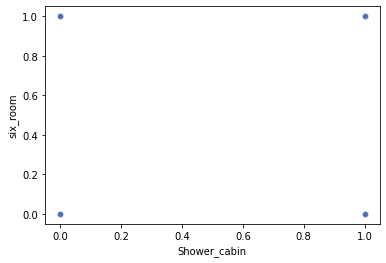

In [271]:
sns.scatterplot(data=df, x='Shower_cabin', y='six_room')

In [1329]:
print(columns := abs(df.corr()['rent_cost']).sort_values(ascending=False)[:40])

rent_cost                 1.000000
Area_m2                   0.749230
rooms                     0.562859
Dictrict_8                0.397821
Dishwasher                0.359931
Shower_cabin              0.354202
Bathroom_combined_3       0.343248
Distance_from_Cremlin     0.341307
Bathroom_combined_2       0.333852
Repair_disigne            0.293033
Ceiling_height_m          0.289055
Bathroom_combined_4       0.276978
Parking_underground       0.254855
Air_conditioner           0.250750
Repair_cosmetic           0.242930
House_panel               0.224092
Bathroom_separate_3       0.204277
ulitsa_dvor               0.203791
Bathroom_combined_1       0.176743
Bathroom_separate_4       0.175651
House_monolithic_brick    0.173988
Telephone                 0.165747
House_noun                0.164721
dvor                      0.147806
Bathroom_combined_0       0.123345
Television                0.121556
Parking_paid_yard         0.106949
House_monolithic          0.105255
Bathroom_separate_2 

In [1330]:
df_train = df[columns.index]

In [1331]:
df_train = df_train[df['Area_m2'] < 250].reset_index(drop = True)

In [1332]:
names = df_train.columns
scaler = preprocessing.MinMaxScaler()
scal = scaler.fit_transform(df_train)
scal_df = pd.DataFrame(scal, columns = names)

In [1344]:
from sklearn import linear_model

X = scal_df.drop('rent_cost', axis=1)
y = scal_df['rent_cost']
#Разделение на тест и трен
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Создаю модель линейной регрессии
regr = linear_model.LinearRegression()

# Тренируем
regr.fit(X_train, y_train)

# Делаем предсказания
y_test_pred = regr.predict(X_test)

# Метрика качества (чем выше, тем лучше)
print(regr.score(X_test, y_test))

0.7337862876910531


In [1335]:
df_train.to_csv('Ivan_Dima_Andrey.csv')